In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from utils import *
pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.max_columns', 100)
matplotlib.rcParams.update({"font.size": 16,'lines.linewidth': 2.5})
# matplotlib.rcdefaults()

figures saved to /tmp/figures


In [2]:
def get_df(file, header = None):
    df = pd.read_csv(file, header=None)
    # df.columns = DF_HEADER.get(key, df.columns)
    df.columns = pd.read_csv("{}.header".format(file.split('.csv')[0])).columns if header is None else header
    return df

In [3]:
DATA_DIR = './cluster-trace-gpu-v2020/simulator/logs/'

In [4]:
file_path = DATA_DIR + '1106-pai_job_duration_estimate_100K.csv-31462-6500g_1n_h0_0p_3sn_0gt-1000ar-20000j-1x-42r.log'

# Reading the log file into a DataFrame, skipping the initial text lines
df = pd.read_csv(file_path, skiprows=2)

# Checking the structure of the DataFrame to confirm correct loading
df.head()

,alloc,preempt,avg_jct,wait_time,makespan,jobs_done,runtime
0,(SJF,LGF),5988.61,949.91,535706,20000,25.02
1,(SJU,LGF),6278.33,1239.62,535706,20000,30.68
2,(SJG,LGF),6071.01,1032.31,535706,20000,27.52
3,(SJGG,LGF),6001.94,963.23,535706,20000,26.44
4,(FIFO,LGF),7918.47,2879.77,535706,20000,55.47


In [ ]:
# 3000
(SJF , LGF),7643.23,2604.53,548553,20000,44.29
(SJGG, LGF),7985.76,2947.05,550610,20000,53.99
(SJG , LGF),8323.22,3284.51,550974,20000,61.99
(SJU , LGF),9124.56,4085.85,545641,20000,77.20
(HRRN_norm, LGF),9137.86,4099.15,535707,20000,83.91
(FairShareGroup, LGF),13064.87,8026.16,535949,20000,130.12
(FIFO, LGF),13120.58,8081.88,535882,20000,136.61
# 4000
(SJF , LGF),6755.64,1716.94,545134,20000,37.31
(SJGG, LGF),6965.67,1926.96,544922,20000,43.37
(SJG , LGF),7175.97,2137.27,547345,20000,47.39
(SJU , LGF),7709.13,2670.42,543514,20000,59.78
(HRRN_norm, LGF),7724.56,2685.85,535706,20000,58.83
(FIFO, LGF),10465.50,5426.80,535706,20000,107.24
(FairShareGroup, LGF),10681.44,5642.73,535741,20000,127.29
# 5000 
alloc,preempt,avg_jct,wait_time,makespan,jobs_done,runtime
(SJF , LGF),6496.93,1458.22,535728,20000,37.65
(SJGG, LGF),6664.21,1625.50,535724,20000,40.13
(SJG , LGF),6730.15,1691.45,535723,20000,42.43
(HRRN_norm, LGF),7010.38,1971.68,535706,20000,48.48
(SJU , LGF),7125.27,2086.57,535706,20000,50.50
(FairShareGroup, LGF),9156.55,4117.85,535706,20000,105.15
(FIFO, LGF),9267.27,4228.57,535706,20000,91.45
# 6500
alloc,preempt,avg_jct,wait_time,makespan,jobs_done,runtime
(SJF , LGF),5988.61,949.91,535706,20000,30.76
(SJGG, LGF),6001.94,963.23,535706,20000,30.33
(SJG , LGF),6071.01,1032.31,535706,20000,32.67
(HRRN_norm, LGF),6236.12,1197.41,535706,20000,36.39
(SJU , LGF),6278.33,1239.62,535706,20000,36.88
(FIFO, LGF),7918.47,2879.77,535706,20000,68.37
(FairShareGroup, LGF),7961.03,2922.32,535706,20000,77.54

In [27]:
data_sjf = {'acg_sjf': [7643.23, 6755.64, 6496.93, 5988.61]}
data_sjgg = {'acg_sjf': [7985.76, 6965.67, 6664.21, 6001.94]}
data_sjg = {'acg_sjf': [8323.22, 7175.97, 6730.15, 6071.01]}
data_hrrn = {'acg_sjf': [9137.86, 7724.56, 7010.38, 6236.12]}
data_sju = {'acg_sjf': [9124.56, 7709.13, 7125.27, 6278.33]}
data_fifo = {'acg_sjf': [13120.58, 10465.50, 9267.27, 7918.47]}
data_fairshare = {'acg_sjf': [13064.87, 10681.44, 9156.55, 7961.03]}

df_sjf = pd.DataFrame(data_sjf, index=['3000', '4000', '5000', '6500' ]) 
df_sjgg = pd.DataFrame(data_sjgg, index=['3000', '4000', '5000', '6500' ]) 
df_sjg = pd.DataFrame(data_sjg, index=['3000', '4000', '5000', '6500' ]) 
df_hrrn = pd.DataFrame(data_hrrn, index=['3000', '4000', '5000', '6500' ]) 
df_sju = pd.DataFrame(data_sju, index=['3000', '4000', '5000', '6500' ]) 
df_fifo = pd.DataFrame(data_fifo, index=['3000', '4000', '5000', '6500' ]) 
df_fairshare = pd.DataFrame(data_fairshare, index=['3000', '4000', '5000', '6500' ]) 

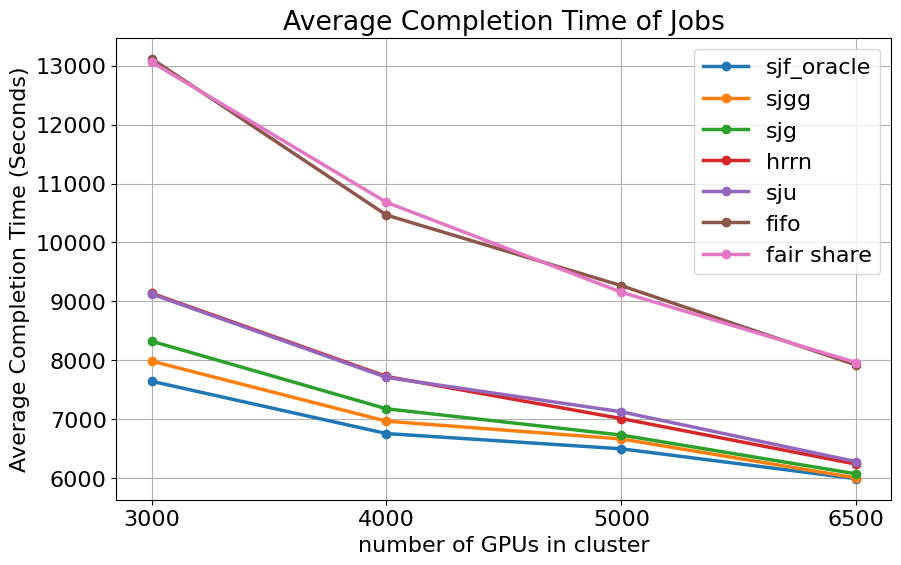

In [34]:
df['avg_jct'] = pd.to_numeric(df['avg_jct'], errors='coerce')

# Plotting again after conversion
plt.figure(figsize=(10, 6))
# plt.plot(df['avg_jct'][:7], marker='o', linestyle='-')
# plt.plot(df['avg_jct'][9:], marker='o', linestyle='-')
plt.plot(df_sjf, marker='o', linestyle='-', label = 'sjf_oracle')
plt.plot(df_sjgg, marker='o', linestyle='-', label = 'sjgg')
plt.plot(df_sjg, marker='o', linestyle='-', label = 'sjg')
plt.plot(df_hrrn, marker='o', linestyle='-', label = 'hrrn')
plt.plot(df_sju, marker='o', linestyle='-', label = 'sju')
plt.plot(df_fifo, marker='o', linestyle='-', label = 'fifo')
plt.plot(df_fairshare, marker='o', linestyle='-', label = 'fair share')
plt.title('Average Completion Time of Jobs')
plt.legend(loc="best")
plt.xlabel('number of GPUs in cluster')
plt.ylabel('Average Completion Time (Seconds)')
plt.grid(True)
# plt.show()
plt.savefig("Act_1.jpg")

In [5]:
s = '5988.61,949.91,535706,20000,28.85, 4008630.36, 22953.00, 5123.00, 25.00'


['5988.61', '949.91', '535706', '20000', '4008630.36', '22953.00', '5123.00', '25.00']


'5988.61&949.91&535706&20000&4008630.36&22953.00&5123.00&25.00'

In [1]:
def convert_table_to_latex(s):
    s_list = s.replace(" ", "").split(",")
    del s_list[4]
    return "&".join(s_list)

In [18]:
s = "7961.03,2922.32,535706,20000,69.91, 13161982.80, 24167.00, 7272.00, 40.00"
convert_table_to_latex(s)

'7961.03&2922.32&535706&20000&13161982.80&24167.00&7272.00&40.00'

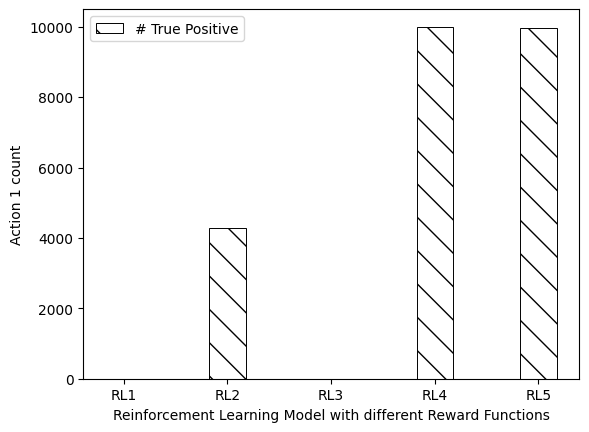

In [13]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['RL1', 'RL2', 'RL3', 'RL4', 'RL5']
data1 = [1, 4280, 0, 9999, 9975]  # First data for each bar

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Plotting the first set of data
rects1 = ax1.bar(x, data1, width, hatch='\\', label='# True Positive', facecolor="none", 
                 edgecolor='black', lw=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Reinforcement Learning Model with different Reward Functions')
ax1.set_ylabel('Action 1 count')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

plt.savefig("single_column_task_1_eval.jpg")


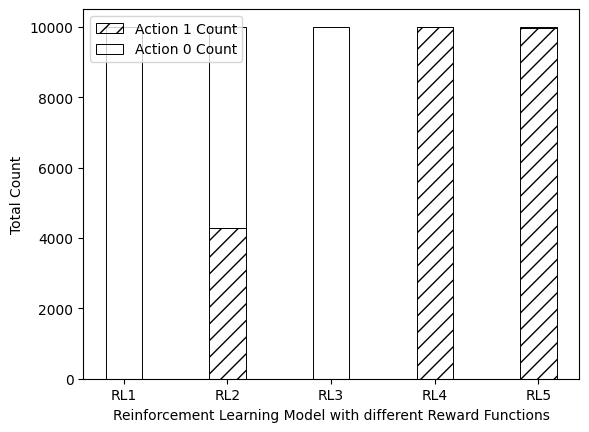

In [17]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['RL1', 'RL2', 'RL3', 'RL4', 'RL5']
data1 = np.array([1, 4280, 0, 9999, 9975])  # First data for each bar
data2 = 10000 - data1  # Second data for each bar, representing the top part

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots()

# Plotting the bottom part of each bar
bottom_part = ax1.bar(x, data1, width, label='Action 1 Count', facecolor="none", edgecolor='black', hatch='//',lw=0.7)

# Plotting the top part of each bar
top_part = ax1.bar(x, data2, width, bottom=data1, label='Action 0 Count', facecolor="none", edgecolor='black',  lw=0.7)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Reinforcement Learning Model with different Reward Functions')
ax1.set_ylabel('Total Count')
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
ax1.legend(loc='upper left')

plt.savefig("RL algorithms action count.jpg")
